#### Extra Model validation

#### steps
- use Morgan counts fingerprints for featurisaton
- test other ML architectures using the fingerprints descriptors
- compare performance with xgboost model, random forest model and svm
- apply models to public dataset

In [1]:
import pandas as pd

df = pd.read_csv("../data/merged_ft_bioavailability_2.csv") 
print(df.head())  


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
   dim_0000  dim_0001  dim_0002  dim_0003  dim_0004  dim_0005  dim_0006  \
0         0         1         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         1         0   

   dim_0007  dim_0008  dim_0009  ...  dim_2039  dim_2040  dim_2041  dim_2042  \
0         0         0         0  ...         0         0         0         0   
1         0         0         0  ...         0         0         0         0   
2         0         0         0  ...         0         0         0         0   
3         0         0         0  ...         0         0         0         

In [2]:
x = df.drop(columns=["Y"])
y = df["Y"]

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

joblib.dump(rf_model, "../models/random_forest_bioavailability.pkl")

y_pred_rf = rf_model.predict(x_test)
y_pred_rf_prob = rf_model.predict_proba(x_test)[:, 1] 


In [6]:
svm_model = SVC(probability=True, kernel='rbf', random_state=42)

svm_model.fit(x_train, y_train)

joblib.dump(svm_model, "../models/svm_bioavailability.pkl")

y_pred_svm = svm_model.predict(x_test)
y_pred_svm_prob = svm_model.predict_proba(x_test)[:, 1]  


In [7]:
def evaluate_model(y_test, y_pred, y_pred_prob, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    print(f"\n {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc:.4f}")

evaluate_model(y_test, y_pred_rf, y_pred_rf_prob, "Random Forest")


evaluate_model(y_test, y_pred_svm, y_pred_svm_prob, "SVM")



 Random Forest Performance:
Accuracy: 0.7891
Precision: 0.7934
Recall: 0.9796
F1 Score: 0.8767
AUC Score: 0.7162

 SVM Performance:
Accuracy: 0.7734
Precision: 0.7805
Recall: 0.9796
F1 Score: 0.8688
AUC Score: 0.7378


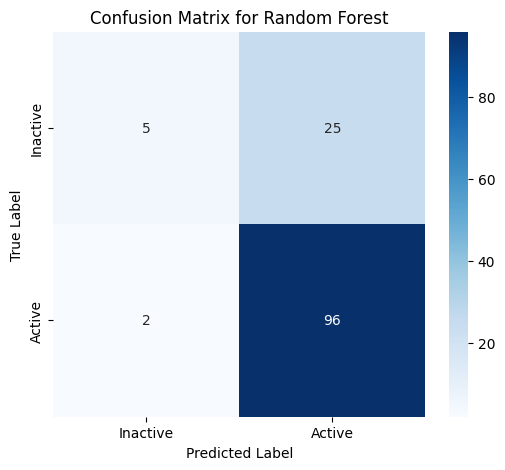

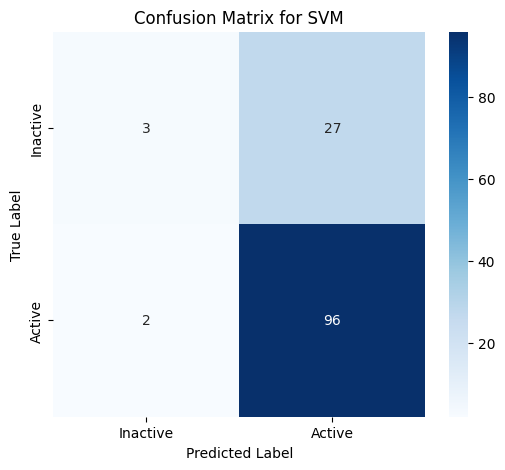

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_svm = confusion_matrix(y_test, y_pred_svm)

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Inactive", "Active"], yticklabels=["Inactive", "Active"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()


plot_confusion_matrix(cm_rf, "Random Forest")

plot_confusion_matrix(cm_svm, "SVM")


In [18]:
from tdc.single_pred import ADME
data = ADME(name = 'HIA_Hou')

Downloading...
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40.1k/40.1k [00:00<00:00, 370kiB/s]
Loading...
Done!


In [19]:
df = data.get_data()

In [24]:
df.to_csv("../data/hia.csv", index=False)
print(df.head())

             Drug_ID                                               Drug  Y
0        Acetanilide                                    CC(=O)Nc1ccccc1  1
1  Acetazolamide.mol                         CC(=O)Nc1nnc(S(N)(=O)=O)s1  1
2       Alfacalcidol  C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...  1
3        Aminopyrine                    Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C  1
4     Amosulalol.mol      COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O  1


In [21]:
ft_df = pd.read_csv("../data/featurised_hia.csv") 

In [23]:
print(ft_df.head())

                 key                                              input  \
0        Acetanilide                                    CC(=O)Nc1ccccc1   
1  Acetazolamide.mol                         CC(=O)Nc1nnc(S(N)(=O)=O)s1   
2       Alfacalcidol  C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...   
3        Aminopyrine                    Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C   
4     Amosulalol.mol      COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O   

   feature_0000  feature_0001  feature_0002  feature_0003  feature_0004  \
0      0.041826     -0.200014     -0.011648      0.183459      0.046324   
1      0.034665      0.034634     -0.217461      0.018387      0.230566   
2      0.018515     -0.105053      0.032394     -0.021206     -0.082939   
3      0.035669     -0.129451     -0.019397     -0.121652      0.072629   
4      0.081152     -0.075124     -0.170408      0.030382      0.076465   

   feature_0005  feature_0006  feature_0007  ...  feature_1014  feature_1015  \
0      0.100852   

In [25]:
df = pd.read_csv("../data/hia.csv")
ft_df = pd.read_csv("../data/featurised_hia.csv")
merged_df = ft_df.merge(df[["Drug_ID", "Y"]], left_on="key", right_on="Drug_ID")
merged_df = merged_df.drop(columns=["key", "input", "Drug_ID"])
merged_df.to_csv("../data/merged_ft_bioavailability.csv", index=False)

In [26]:
x = merged_df.drop(columns=["Y"])
y = merged_df["Y"]

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [28]:
import joblib
model = joblib.load("../models/bioavailability.pkl")

In [33]:
threshold = 0.9
y_pred_custom = (y_pred_prob >= threshold).astype(int)

In [30]:
y_pred_prob = model.predict_proba(x_test)[:, 1]

In [35]:
accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

Accuracy: 0.8103
Precision: 0.8980
Recall: 0.8800
F1 Score: 0.8889
AUC Score: 0.7975


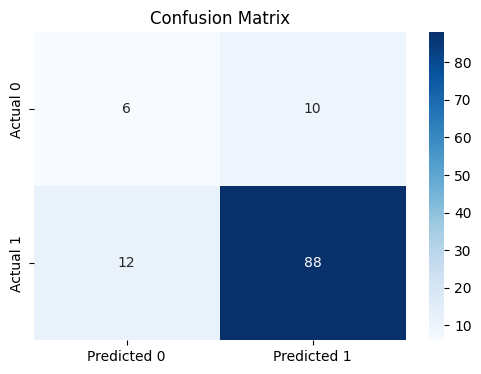

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.show()

In [37]:
ft_df = pd.read_csv("../data/mc_featurised_hia.csv") 

In [38]:
print(ft_df.head())

                 key                                              input  \
0        Acetanilide                                    CC(=O)Nc1ccccc1   
1  Acetazolamide.mol                         CC(=O)Nc1nnc(S(N)(=O)=O)s1   
2       Alfacalcidol  C=C1/C(=C\C=C2/CCC[C@]3(C)[C@@H]2CC[C@H]3[C@@H...   
3        Aminopyrine                    Cc1c(N(C)C)c(=N)n(-c2ccccc2)n1C   
4     Amosulalol.mol      COc1ccccc1OCCNC[C@@H](O)c1ccc(C)cc1S(N)(=O)=O   

   dim_0000  dim_0001  dim_0002  dim_0003  dim_0004  dim_0005  dim_0006  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         2         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         1         0         0         0         0         0   

   dim_0007  ...  dim_2038  dim_2039  dim_2040  dim_2041  dim_2042  dim_2043  \
0         0  ...  

In [39]:
df = pd.read_csv("../data/hia.csv")
ft_df = pd.read_csv("../data/mc_featurised_hia.csv")
merged_df = ft_df.merge(df[["Drug_ID", "Y"]], left_on="key", right_on="Drug_ID")
merged_df = merged_df.drop(columns=["key", "input", "Drug_ID"])
merged_df.to_csv("../data/merged_ft_bioavailability.csv", index=False)

In [40]:
x = merged_df.drop(columns=["Y"])
y = merged_df["Y"]

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [42]:
import joblib
model = joblib.load("../models/random_forest_bioavailability.pkl")

In [43]:
y_pred_prob = model.predict_proba(x_test)[:, 1]

In [44]:
threshold = 0.9
y_pred_custom = (y_pred_prob >= threshold).astype(int)

In [45]:
accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

Accuracy: 0.5603
Precision: 0.9804
Recall: 0.5000
F1 Score: 0.6623
AUC Score: 0.8228


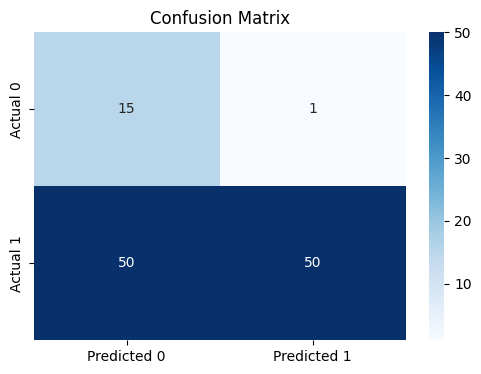

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.show()

In [47]:
import joblib
model = joblib.load("../models/svm_bioavailability.pkl")

In [48]:
y_pred_prob = model.predict_proba(x_test)[:, 1]
threshold = 0.9
y_pred_custom = (y_pred_prob >= threshold).astype(int)

In [49]:
accuracy = accuracy_score(y_test, y_pred_custom)
precision = precision_score(y_test, y_pred_custom)
recall = recall_score(y_test, y_pred_custom)
f1 = f1_score(y_test, y_pred_custom)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

Accuracy: 0.1552
Precision: 1.0000
Recall: 0.0200
F1 Score: 0.0392
AUC Score: 0.8688


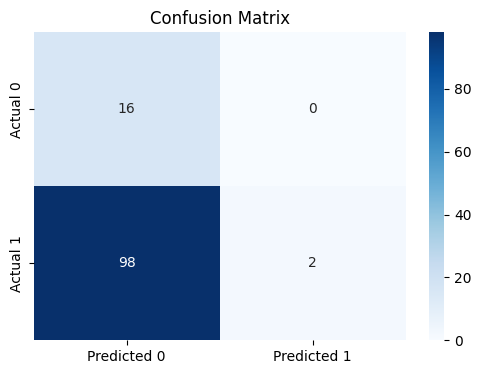

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.show()